In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from sklearn .model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#ネットワーク構築
encoding_dim = 32
input_img = Input(shape=(784,))
encorded = Dense(encoding_dim, activation='relu')(input_img)
decorded = Dense(784, activation='sigmoid')(encorded)
autoencoder = Model(input =input_img, output=decorded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_19 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [0]:
#MNISTデータ読み込み
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [0]:

#学習データを「１」「４」のみにする
x1 = []
for i in range(len(x_train)):
  if y_train[i] == 1 or y_train[i] == 4:
    x1.append(x_train[i])
x_train = np.array(x1)

#テストデータを「１」と「９」にする
x2, y = [],[]
for i in range(len(x_test)):
  if y_test[i] == 1 or y_test[i] == 4 or y_test[i] == 9:
    x2.append(x_test[i])
    y.append(y_test[i])
x_test = np.array(x2)
y = np.array(y)


In [55]:
#データ前準備
x_train, x_valid = train_test_split(x_train, test_size=0.175)
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
print(x_train.shape)
x_valid = x_valid.reshape(len(x_valid), np.prod(x_valid.shape[1:]))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(10381, 28, 28)
(10381, 784)


In [56]:
#学習
autoencoder.fit(x_train, x_train,
               nb_epoch=50,
               batch_size=256,
               shuffle=True,
                validation_data=(x_valid,x_valid))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 10381 samples, validate on 2203 samples
Epoch 1/50
10381/10381 [==============================] - 1s 110us/step - loss: 0.6561 - val_loss: 78.2145
Epoch 2/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.3421 - val_loss: 206.6003
Epoch 3/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.2257 - val_loss: 196.9845
Epoch 4/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.2100 - val_loss: 176.4015
Epoch 5/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.2000 - val_loss: 143.6174
Epoch 6/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.1900 - val_loss: 78.1623
Epoch 7/50
10381/10381 [==============================] - 1s 66us/step - loss: 0.1808 - val_loss: 30.8527
Epoch 8/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.1736 - val_loss: -0.5134
Epoch 9/50
10381/10381 [==============================] - 1s 67us/step - loss: 0.1681 - val_loss: 

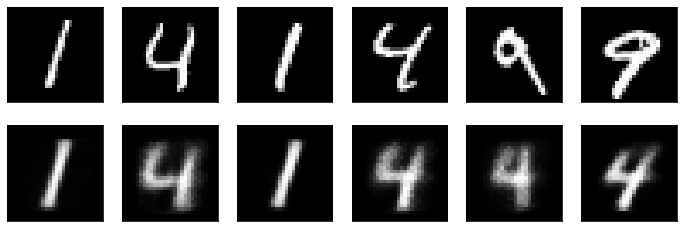

In [57]:
#出力画像の取得
decoded_imgs = autoencoder.predict(x_test)

#サンプル画像表示
n = 6
plt.figure(figsize=(12,4))
for i in range(n):
  #テスト画像表示
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  #出力画像の表示
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
  